# Import Library yang Diperlukan

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


# Load dan Preprocessing Data

In [4]:
# Definisikan path dataset
dataset_dir = './AppleDataset'

# Ukuran gambar yang akan di-resize
img_size = 128

# Kategori kematangan
categories = ['20%', '40%', '60%', '80%', '100%']

# Fungsi untuk membaca dan memuat gambar
def load_images_from_folder(folder):
    images = []
    labels = []
    for category in categories:
        path = os.path.join(folder, category)
        class_num = categories.index(category)  # 0: 20%, 1: 40%, dst.
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_img = cv2.resize(img_array, (img_size, img_size))
                images.append(resized_img)
                labels.append(class_num)
            except Exception as e:
                print(e)
    return np.array(images), np.array(labels)

# Memuat gambar dan labelnya
images, labels = load_images_from_folder(dataset_dir)

# Normalisasi data
images = images / 255.0

# Mengubah label menjadi one-hot encoding
labels = to_categorical(labels)

# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


# Augmentasi Data

In [5]:
# Augmentasi gambar
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Fit augmentasi hanya pada data training
datagen.fit(X_train)


# Membangun Model CNN

In [6]:
# Membangun model CNN
model = Sequential()

# Layer Convolutional
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout untuk menghindari overfitting
model.add(Dense(5, activation='softmax'))  # 5 kelas kematangan

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Menampilkan arsitektur model
model.summary()


C:\Users\SENTOLOP-DESKTOP\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,285 (12.61 MB)

 Trainable params: 3,305,285 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

# Pelatihan Model

In [7]:
# Latih model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=25, validation_data=(X_test, y_test))


Epoch 1/25


C:\Users\SENTOLOP-DESKTOP\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 286ms/step - accuracy: 0.2069 - loss: 1.8881 - val_accuracy: 0.2500 - val_loss: 1.5814
Epoch 2/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 261ms/step - accuracy: 0.2393 - loss: 1.5707 - val_accuracy: 0.5400 - val_loss: 1.3443
Epoch 3/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 260ms/step - accuracy: 0.3992 - loss: 1.4141 - val_accuracy: 0.5900 - val_loss: 1.0628
Epoch 4/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 247ms/step - accuracy: 0.4596 - loss: 1.2669 - val_accuracy: 0.6700 - val_loss: 1.0287
Epoch 5/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 252ms/step - accuracy: 0.5319 - loss: 1.1255 - val_accuracy: 0.6800 - val_loss: 0.8624
Epoch 6/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 242ms/step - accuracy: 0.4710 - loss: 1.1540 - val_accuracy: 0.6400 - val_loss: 0.9319
Epoch 7/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 245ms/step - accuracy: 0.5287 - loss: 1.0877 - val_accuracy: 0.6600 - val_loss: 0.9182
Epoch 8/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 257ms/step - accuracy: 0.6233 - loss: 1.0491 - val_accuracy: 0.7300 - val_

# Evaluasi Model

In [8]:
# Evaluasi model
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix dan Laporan Klasifikasi
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, target_names=categories))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
[[25  3  0  0  0]
 [ 1 13  0  0  0]
 [ 0  0  8  0  2]
 [ 0  0  1 20  3]
 [ 0  4  4  1 15]]
              precision    recall  f1-score   support

         20%       0.96      0.89      0.93        28
         40%       0.65      0.93      0.76        14
         60%       0.62      0.80      0.70        10
         80%       0.95      0.83      0.89        24
        100%       0.75      0.62      0.68        24

    accuracy                           0.81       100
   macro avg       0.79      0.82      0.79       100
weighted avg       0.83      0.81      0.81       100



# Visualisasi Hasil Pelatihan

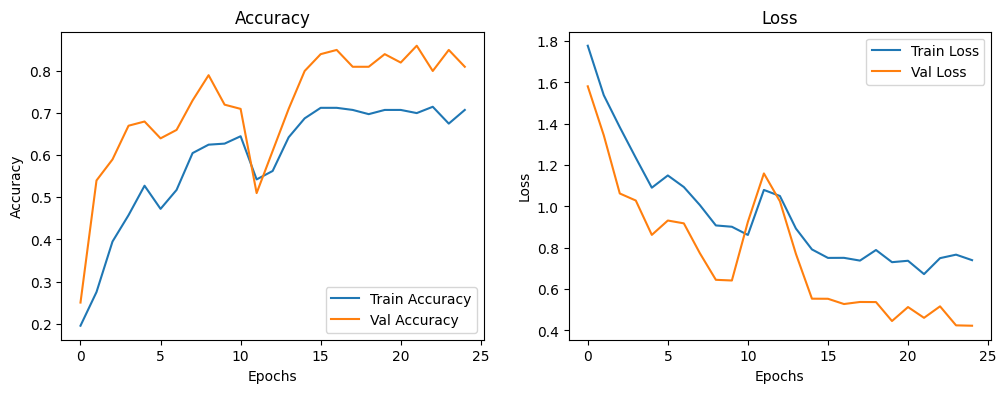

In [9]:
# Visualisasi akurasi dan loss
plt.figure(figsize=(12, 4))

# Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()


# Prediksi Gambar Baru

In [10]:
# Prediksi gambar baru
def predict_image(img_path):
    img = cv2.imread(img_path)
    img_resized = cv2.resize(img, (img_size, img_size))
    img_normalized = img_resized / 255.0
    img_reshaped = np.reshape(img_normalized, (1, img_size, img_size, 3))
    
    prediction = model.predict(img_reshaped)
    class_idx = np.argmax(prediction)
    return categories[class_idx]

# Contoh penggunaan
img_path = '60persen.jpg'
predicted_class = predict_image(img_path)
print(f'Tingkat kematangan apel: {predicted_class}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Tingkat kematangan apel: 60%
